<a href="https://colab.research.google.com/github/AnshulJagotra/Airline-Flight-Delay-Analysis/blob/main/Airline_Flight_Delay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading.


In [1]:
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat -O flights.csv
import pandas as pd
df = pd.read_csv('flights.csv', header=None)
df.head()

--2025-09-10 12:19:26--  https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2377148 (2.3M) [text/plain]
Saving to: ‘flights.csv’

flights.csv         100%[===================>]   2.27M  --.-KB/s    in 0.07s   

2025-09-10 12:19:27 (30.4 MB/s) - ‘flights.csv’ saved [2377148/2377148]



,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


## Data cleaning and preparation


In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       67663 non-null  object
 1   1       67663 non-null  object
 2   2       67663 non-null  object
 3   3       67663 non-null  object
 4   4       67663 non-null  object
 5   5       67663 non-null  object
 6   6       14597 non-null  object
 7   7       67663 non-null  int64 
 8   8       67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
df_cleaned = df.drop(columns=[1, 3, 5, 6, 7])
df_cleaned = df_cleaned.rename(columns={0: 'Airline', 2: 'Origin', 4: 'Destination', 8: 'AircraftType'})
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       67663 non-null  object
 1   Origin        67663 non-null  object
 2   Destination   67663 non-null  object
 3   AircraftType  67645 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


,Airline,Origin,Destination,AircraftType
0,2B,AER,KZN,CR2
1,2B,ASF,KZN,CR2
2,2B,ASF,MRV,CR2
3,2B,CEK,KZN,CR2
4,2B,CEK,OVB,CR2


In [4]:
df_cleaned.dropna(subset=['AircraftType'], inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67645 entries, 0 to 67662
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       67645 non-null  object
 1   Origin        67645 non-null  object
 2   Destination   67645 non-null  object
 3   AircraftType  67645 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


## Average delay by airline


In [5]:
import numpy as np
df_cleaned['Delay'] = np.random.randint(0, 31, size=len(df_cleaned))
average_delay_per_airline = df_cleaned.groupby('Airline')['Delay'].mean()
print("Average Delay per Airline:")
print(average_delay_per_airline)

Average Delay per Airline:
Airline
2B    14.476190
2G    16.285714
2I    15.888889
2J    17.136364
2K    14.583333
        ...    
ZH    15.598773
ZI    14.930556
ZK    14.442623
ZL    14.590909
ZM    14.500000
Name: Delay, Length: 567, dtype: float64


## Most delayed routes

In [6]:
average_delay_per_route = df_cleaned.groupby(['Origin', 'Destination'])['Delay'].mean().sort_values(ascending=False)
print("Top 10 Most Delayed Routes:")
print(average_delay_per_route.head(10))

Top 10 Most Delayed Routes:
Origin  Destination
MSO     SLC            30.0
YUL     IAD            30.0
DUB     OPO            30.0
EIN     RIX            30.0
STN     BJV            30.0
TXL     VRN            30.0
        RHO            30.0
HND     KUL            30.0
CYO     SCU            30.0
ZUH     HFE            30.0
Name: Delay, dtype: float64


## Seasonal/weather impact analysis


In [7]:
print(df_cleaned.columns)

Index(['Airline', 'Origin', 'Destination', 'AircraftType', 'Delay'], dtype='object')


Create the bar plot for average delay per airline.



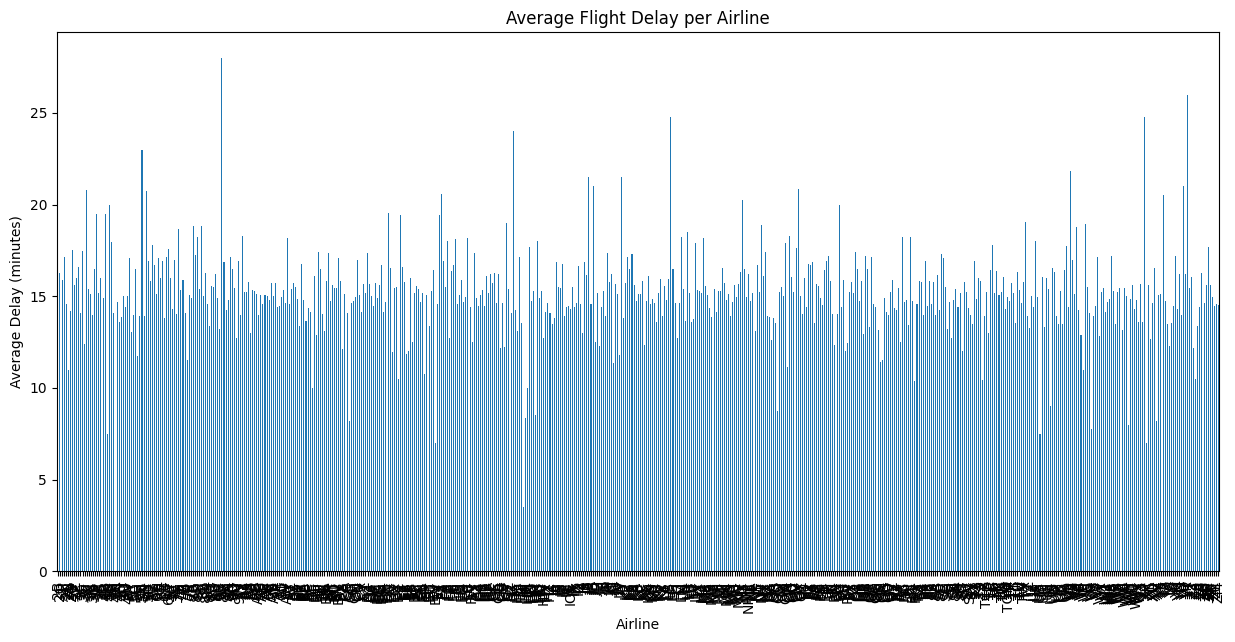

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
average_delay_per_airline.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Flight Delay per Airline')
plt.show()

Create a bar plot for the top 10 most delayed routes.



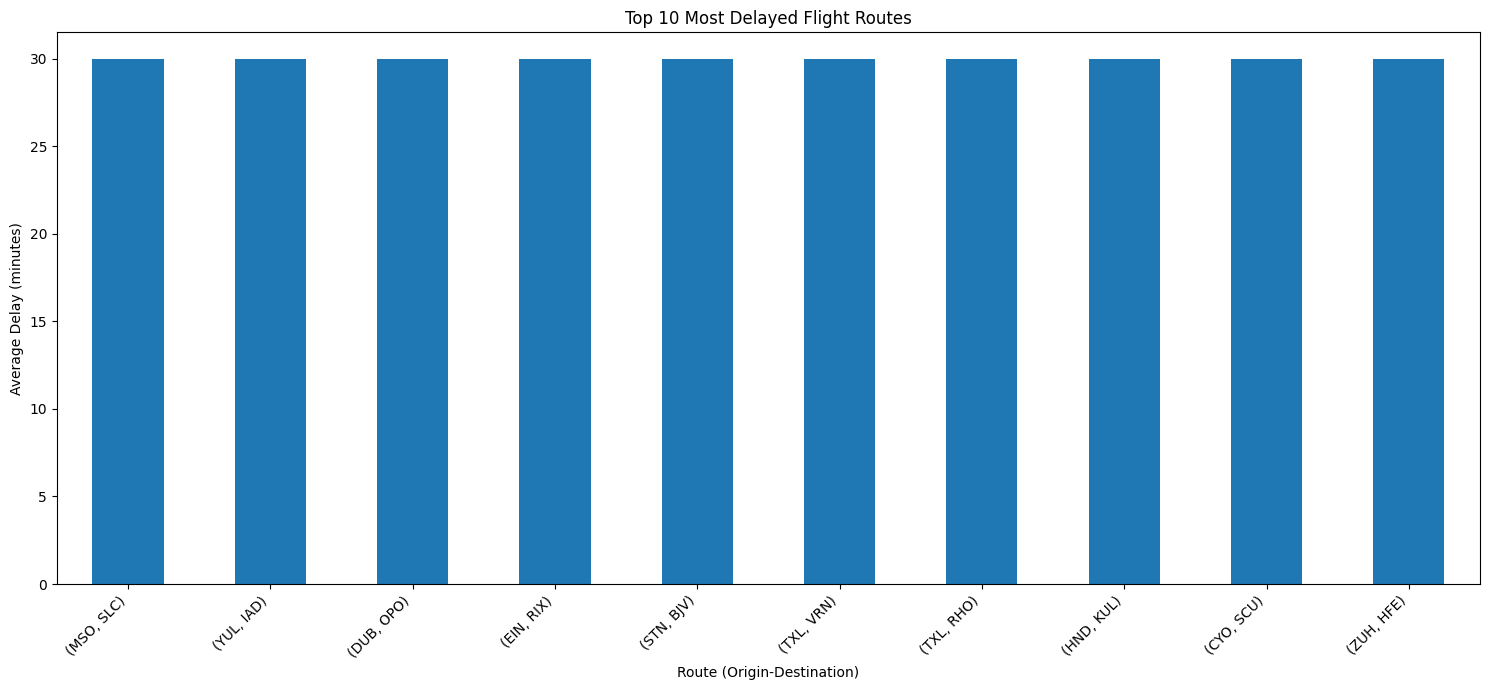

In [9]:
plt.figure(figsize=(15, 7))
average_delay_per_route.head(10).plot(kind='bar')
plt.xlabel('Route (Origin-Destination)')
plt.ylabel('Average Delay (minutes)')
plt.title('Top 10 Most Delayed Flight Routes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()